In [2]:
import wandb
wandb.login()

True

import all needed libraries and check if raw data were loaded correctly

In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

seed = 50
np.random.seed(seed)


csv_path = "https://raw.githubusercontent.com/marekfejda/ZNEUS_data/refs/heads/main/phpSSK7iA.csv"

df = pd.read_csv(csv_path)

print("Shape:", df.shape)
df.head()

Shape: (3751, 1777)


,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776,target
0,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1
2,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


check for any missing values or some other data types other that float

In [2]:
df.info()

print("\nColumns with missing values or unexpected types")

missing_cols = df.columns[df.isnull().any()].tolist()

non_float_cols = [col for col in df.columns if df[col].dtype != float]

if len(missing_cols) > 0:
    print("\n--- Columns with missing values ---")
    for col in missing_cols:
        print(col, df[col].isnull().sum())
else:
    print("No missing-value columns found.")

if len(non_float_cols) > 0:
    print("\n--- Columns with unexpected types ---")
    for col in non_float_cols:
        print(col, df[col].dtype)
else:
    print("No non-float columns found.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3751 entries, 0 to 3750
Columns: 1777 entries, D1 to target
dtypes: float64(1776), int64(1)
memory usage: 50.9 MB

Columns with missing values or unexpected types
No missing-value columns found.

--- Columns with unexpected types ---
target int64


check the ratio of 0s and 1s of y for good classification

In [3]:
unique_vals = df['target'].unique()
print("Unique values for target:", unique_vals)

# Count how many 0s and 1s
value_counts = df['target'].value_counts()
print("\nCounts per value:")
for val, count in value_counts.items():
    print(f"  {val}: {count}")

# show class balance ratio
ratio = value_counts / len(df)
print("\nProportion per value:")
for val, r in ratio.items():
    print(f"  {val}: {r:.2%}")

Unique values for target: [1 0]

Counts per value:
  1: 2034
  0: 1717

Proportion per value:
  1: 54.23%
  0: 45.77%


plot the graph of data to visualize them for better preprocessing

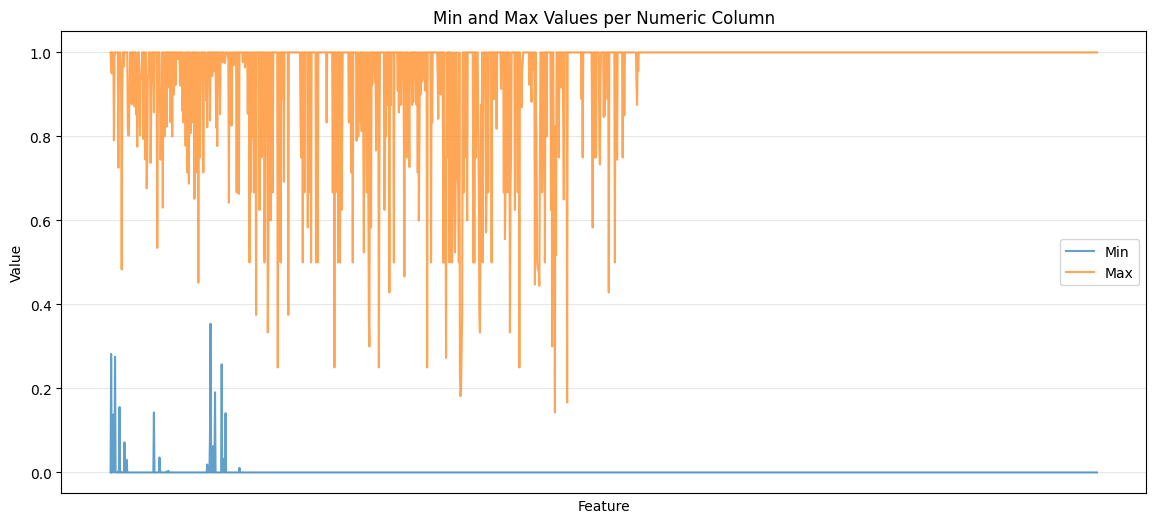

In [4]:
summary = pd.DataFrame({
    "min": df.min(numeric_only=True),
    "max": df.max(numeric_only=True)
})

summary = summary.reset_index().rename(columns={'index': 'feature'})
# The graphs were created with the assistance of AI tools
plt.figure(figsize=(14, 6))
plt.plot(summary["feature"], summary["min"], label="Min", alpha=0.7)
plt.plot(summary["feature"], summary["max"], label="Max", alpha=0.7)
plt.title("Min and Max Values per Numeric Column")
plt.xlabel("Feature")
plt.ylabel("Value")
plt.legend()
plt.xticks([], [])
plt.grid(True, alpha=0.3)
plt.show()

We selected three different methods for feature selection, merged their results into a unified ranking, and then chose the final features based on that combined selection.

weve chosen these 3, because each method looks at the data little bit differently, so we have more general resuilt at the end when we merge all of the feature results together

In [5]:
X = df.drop(columns=['target'])
y = df['target']

# correlation feature selection

The graphs were created with the assistance of AI tools

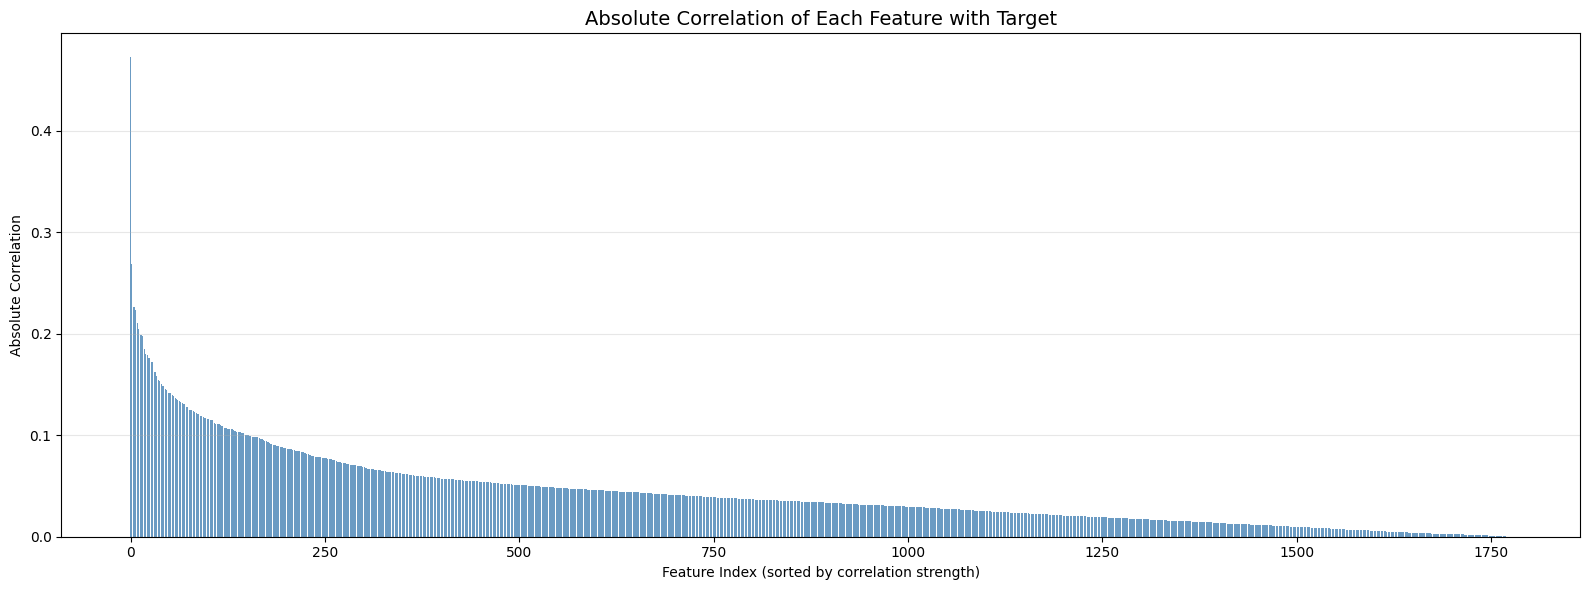

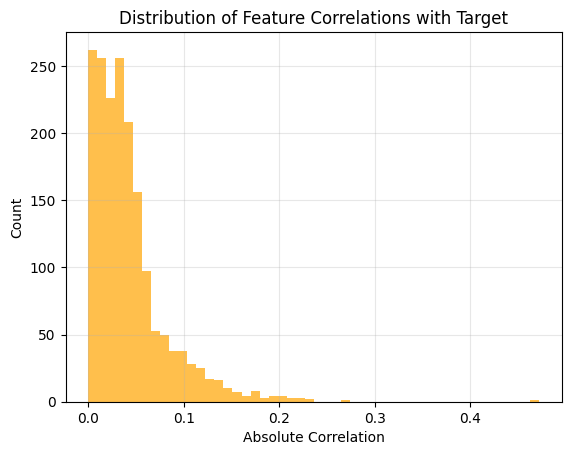

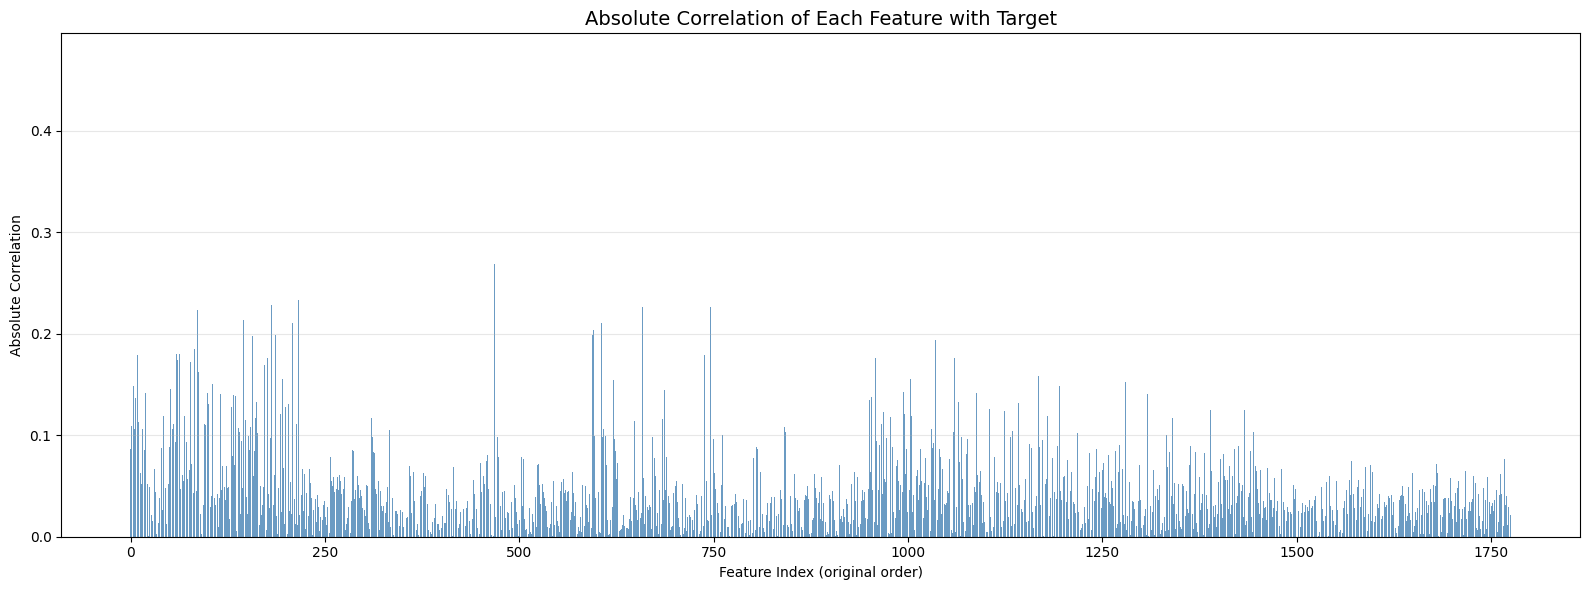

In [6]:
corr = X.corrwith(y)

corr_abs = corr.abs().sort_values(ascending=False)

plt.figure(figsize=(16, 6))
plt.bar(range(len(corr_abs)), corr_abs, color='steelblue', alpha=0.8)
plt.title('Absolute Correlation of Each Feature with Target', fontsize=14)
plt.xlabel('Feature Index (sorted by correlation strength)')
plt.ylabel('Absolute Correlation')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# correlation distribution
plt.hist(corr_abs, bins=50, color='orange', alpha=0.7)
plt.title('Distribution of Feature Correlations with Target')
plt.xlabel('Absolute Correlation')
plt.ylabel('Count')
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(16, 6))
plt.bar(range(len(corr.abs())), corr.abs(), color='steelblue', alpha=0.8)
plt.title('Absolute Correlation of Each Feature with Target', fontsize=14)
plt.xlabel('Feature Index (original order)')
plt.ylabel('Absolute Correlation')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# mutual information

The graphs were created with the assistance of AI tools

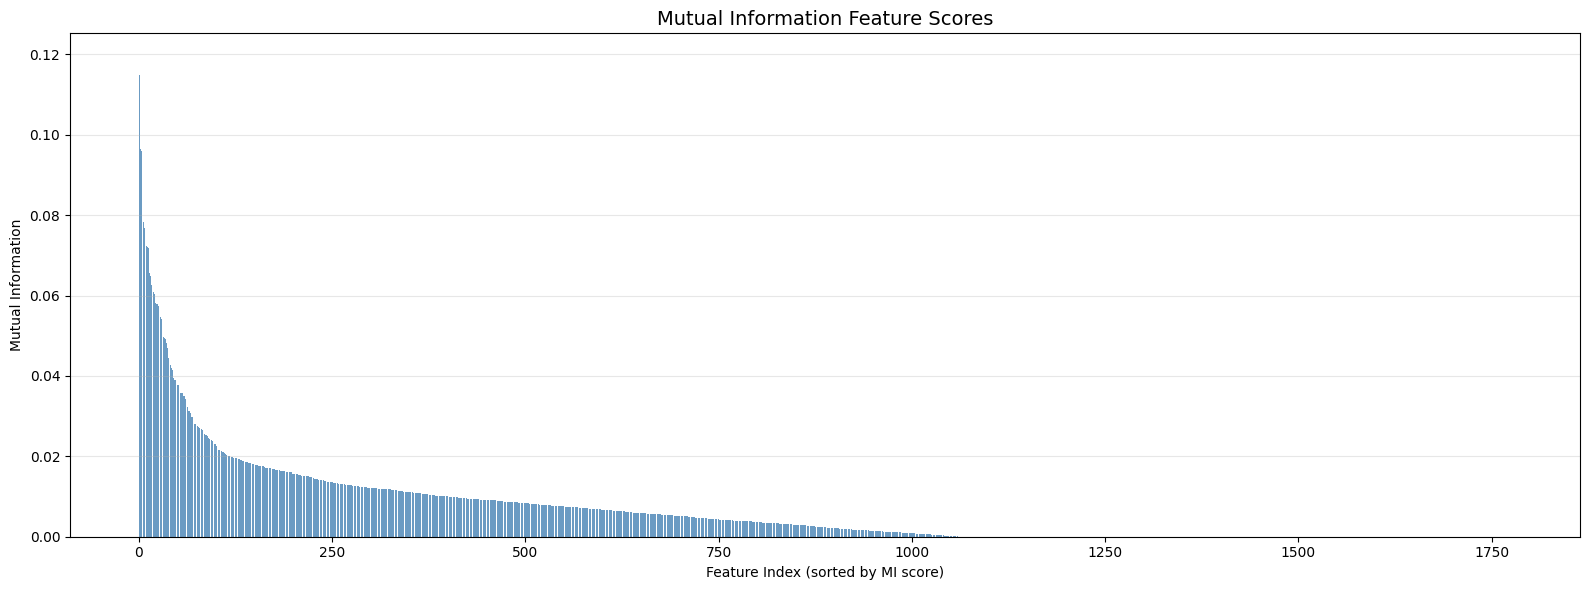

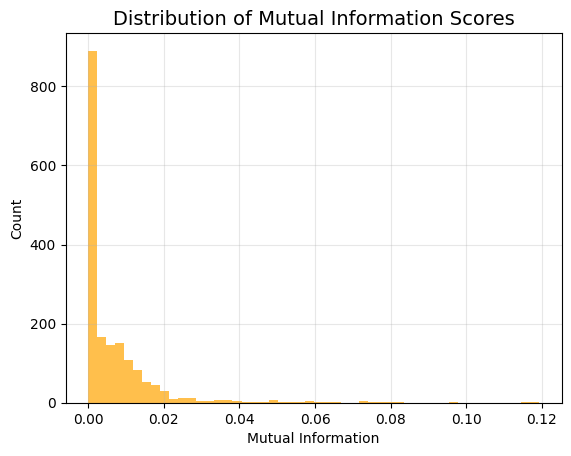

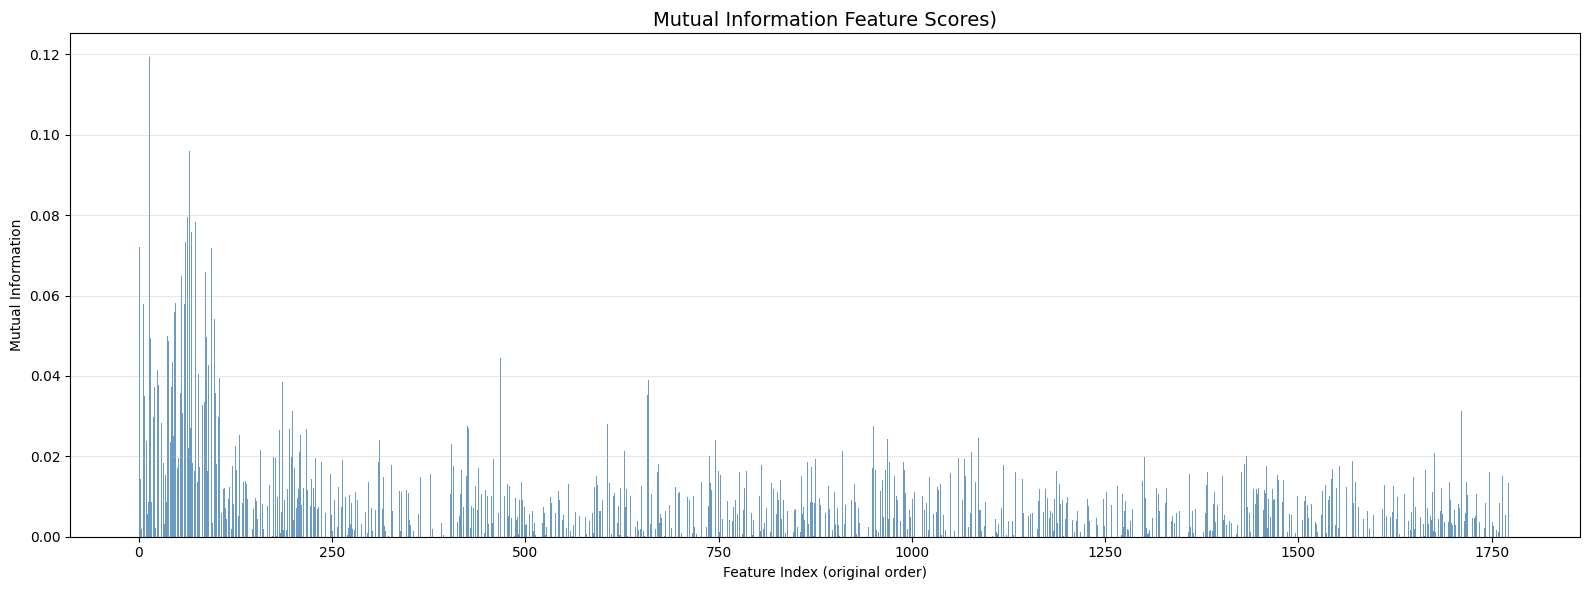

In [7]:
mi = mutual_info_classif(X, y, random_state=seed)
    
scores = pd.Series(mi, index=X.columns)
scores_sorted = scores.sort_values(ascending=False)


plt.figure(figsize=(16, 6))
plt.bar(range(len(scores_sorted)), scores_sorted.values, color='steelblue', alpha=0.8)
plt.title('Mutual Information Feature Scores', fontsize=14)
plt.xlabel('Feature Index (sorted by MI score)')
plt.ylabel('Mutual Information')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# correlation distribution
plt.hist(scores.values, bins=50, color='orange', alpha=0.7)
plt.title('Distribution of Mutual Information Scores', fontsize=14)
plt.xlabel('Mutual Information')
plt.ylabel('Count')
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(16, 6))
plt.bar(range(len(scores)), scores.values, color='steelblue', alpha=0.8)
plt.title('Mutual Information Feature Scores)', fontsize=14)
plt.xlabel('Feature Index (original order)')
plt.ylabel('Mutual Information')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# random forest

The graphs were created with the assistance of AI tools

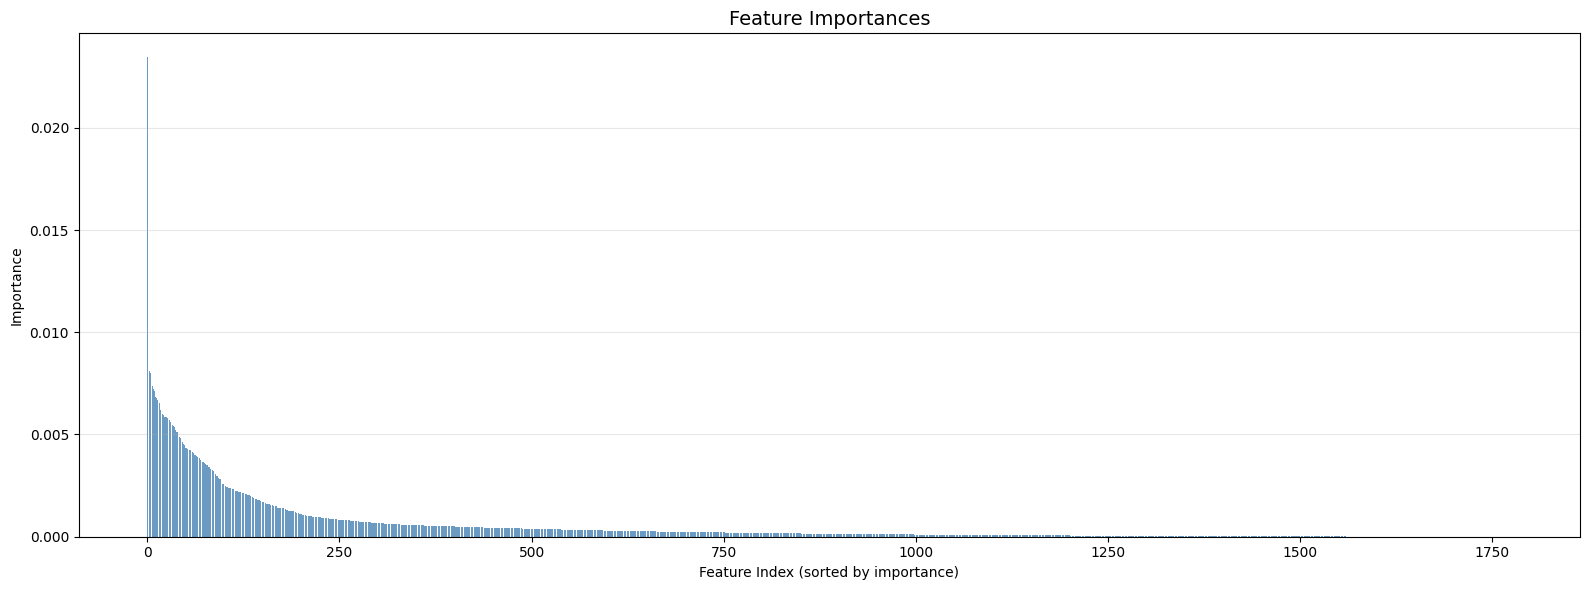

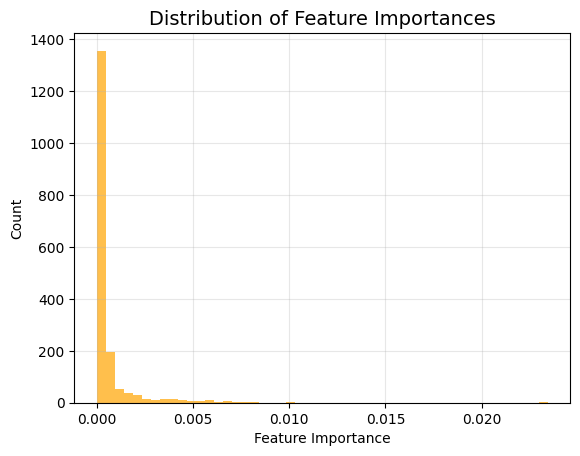

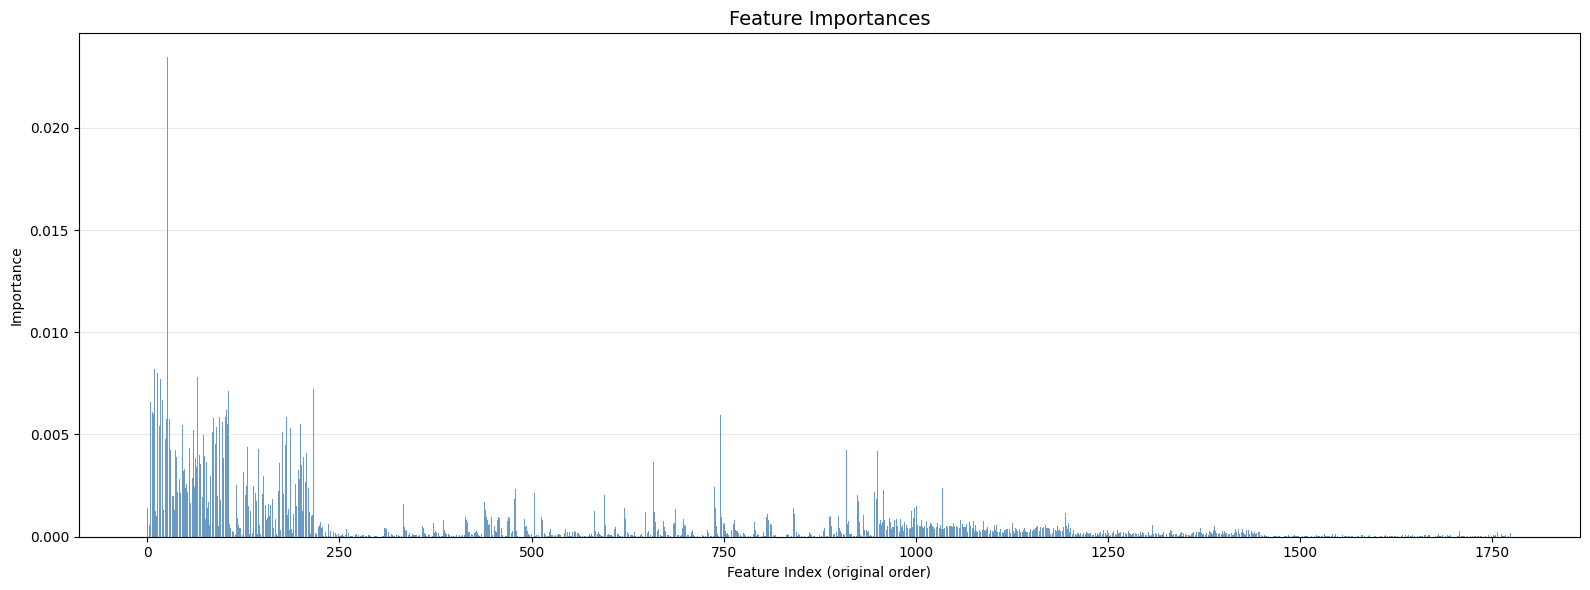

In [8]:
clf = RandomForestClassifier(random_state=seed)
clf = clf.fit(X, y)

importances = pd.Series(clf.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)

plt.figure(figsize=(16, 6))
plt.bar(range(len(importances_sorted)), importances_sorted.values, color='steelblue', alpha=0.8)
plt.title('Feature Importances', fontsize=14)
plt.xlabel('Feature Index (sorted by importance)')
plt.ylabel('Importance')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# correlation distribution
plt.hist(importances.values, bins=50, color='orange', alpha=0.7)
plt.title('Distribution of Feature Importances', fontsize=14)
plt.xlabel('Feature Importance')
plt.ylabel('Count')
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(16, 6))
plt.bar(range(len(importances)), importances.values, color='steelblue', alpha=0.8)
plt.title('Feature Importances', fontsize=14)
plt.xlabel('Feature Index (original order)')
plt.ylabel('Importance')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# combined selections

The graphs were created with the assistance of AI tools

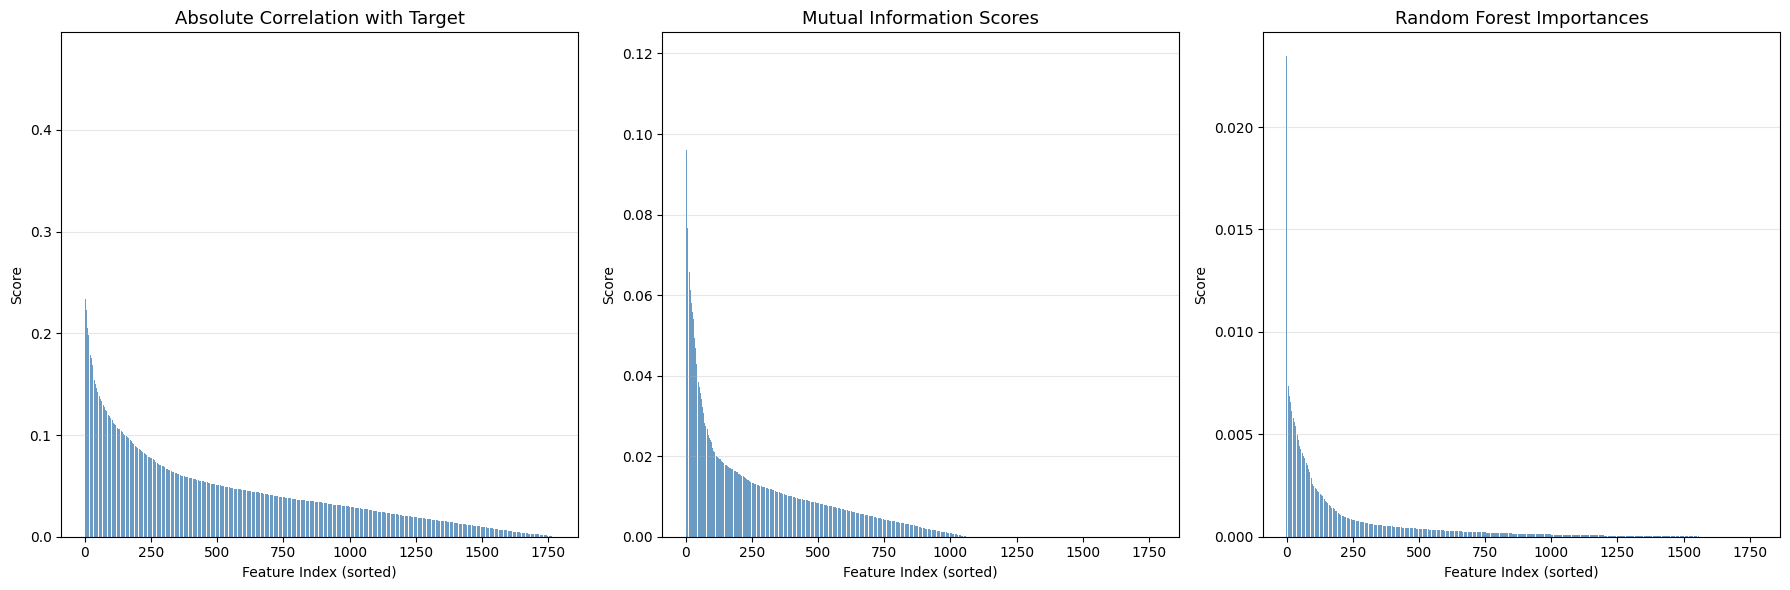

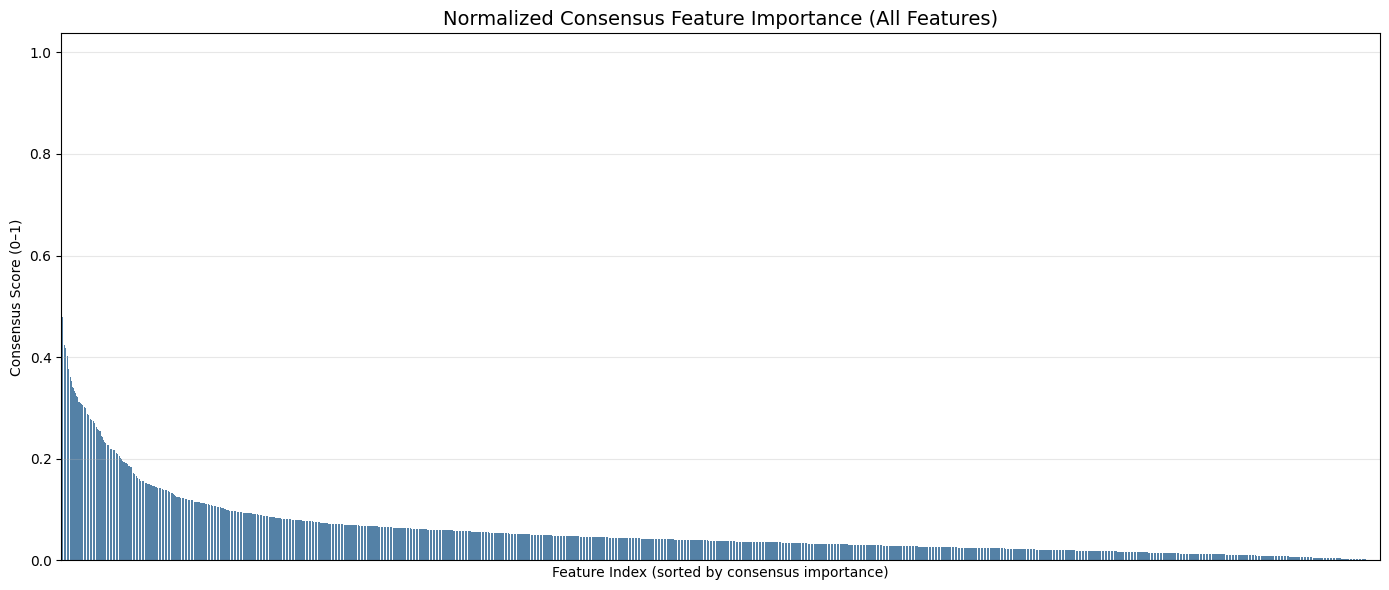

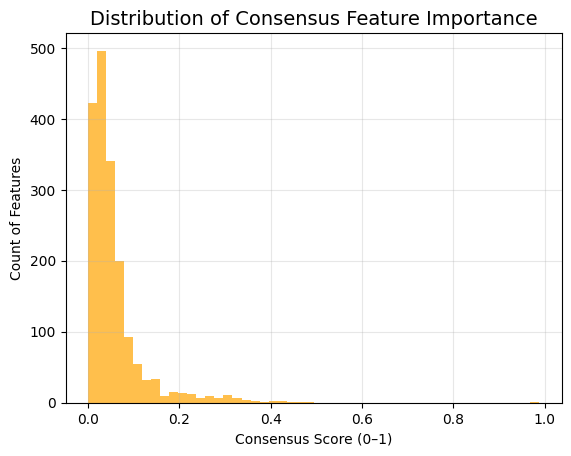

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes = axes.flatten()

titles = [
    "Absolute Correlation with Target",
    "Mutual Information Scores",
    "Random Forest Importances"
]
data = [corr_abs, scores_sorted, importances_sorted]

for i, ax in enumerate(axes):
    ax.bar(range(len(data[i])), data[i].values, color='steelblue', alpha=0.8)
    ax.set_title(titles[i], fontsize=13)
    ax.set_xlabel("Feature Index (sorted)")
    ax.set_ylabel("Score")
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

combined_df = pd.DataFrame({
    'Correlation': corr_abs.reindex(X.columns).fillna(0),
    'MutualInformation': scores.reindex(X.columns).fillna(0),
    'RandomForest': importances.reindex(X.columns).fillna(0)
})

scaler = MinMaxScaler()
combined_scaled = pd.DataFrame(
    scaler.fit_transform(combined_df),
    columns=combined_df.columns,
    index=combined_df.index
)

combined_scaled["ConsensusScore"] = combined_scaled.mean(axis=1)
combined_scaled_sorted = combined_scaled.sort_values("ConsensusScore", ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(
    x=range(len(combined_scaled_sorted)),
    y=combined_scaled_sorted["ConsensusScore"].values,
    color="steelblue"
)
plt.title("Normalized Consensus Feature Importance (All Features)", fontsize=14)
plt.xlabel("Feature Index (sorted by consensus importance)")
plt.ylabel("Consensus Score (0–1)")
plt.xticks([])  # hide x labels
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

plt.hist(combined_scaled_sorted["ConsensusScore"], bins=50, color='orange', alpha=0.7)
plt.title("Distribution of Consensus Feature Importance", fontsize=14)
plt.xlabel("Consensus Score (0–1)")
plt.ylabel("Count of Features")
plt.grid(alpha=0.3)
plt.show()


We applied a threshold to the combined feature selection to retain only the most relevant features.

In [10]:
threshold = 0.05
selected_features = combined_scaled_sorted[combined_scaled_sorted["ConsensusScore"] >= threshold].index

print(f"Selected {len(selected_features)} features out of {len(combined_scaled_sorted)}")

df_filtered = df[selected_features.tolist() + ['target']]

Selected 653 features out of 1776


In [ ]:
class DataModule:
    def __init__(self, df_filtered):
        X = df_filtered.iloc[:, :-1].values.astype(np.float32)
        y = df_filtered.iloc[:, -1].values.astype(np.float32).reshape(-1, 1)

        # Step 1: split off test set first
        X_temp, X_test, y_temp, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )

        # Step 2: from the remaining 80%, make train/val split
        X_train, X_val, y_train, y_val = train_test_split(
            X_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp
        )

        # print check if after spliting the ratio is same
        print(y_train.mean(), y_val.mean(), y_test.mean())

        self.scaler = StandardScaler()
        X_train = self.scaler.fit_transform(X_train)
        X_val   = self.scaler.transform(X_val)
        X_test  = self.scaler.transform(X_test)

        self.x_train = torch.tensor(X_train)
        self.y_train = torch.tensor(y_train)
        self.x_val = torch.tensor(X_val)
        self.y_val = torch.tensor(y_val)
        self.x_test = torch.tensor(X_test)
        self.y_test = torch.tensor(y_test)

        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        # class imbalance handling
        pos = (y_train == 1).sum()
        neg = (y_train == 0).sum()
        self.pos_weight = torch.tensor([neg / max(pos, 1)], dtype=torch.float32).to(device)

    def setup(self, cfg):
        # create dataloaders when using batch training
        self.dataloader_train = torch.utils.data.dataloader.DataLoader(
            torch.utils.data.TensorDataset(self.x_train, self.y_train), batch_size=cfg.batch_size,
            shuffle=True, num_workers=cfg.num_workers, pin_memory=torch.cuda.is_available()
        )
        self.dataloader_val = torch.utils.data.dataloader.DataLoader(
            torch.utils.data.TensorDataset(self.x_val, self.y_val), batch_size=cfg.batch_size,
            shuffle=False, num_workers=cfg.num_workers, pin_memory=torch.cuda.is_available()
        )

simple statistics to track the efficiency of model

In [ ]:
class Statistics:
    def __init__(self):
        self.values = dict()

    def step(self, key, value):
        sum, count = 1.0, 1.0
        if key in self.values:
            sum, count = self.values[key]
        sum += value
        count += 1
        self.values[key] = sum, count

    def get(self):
        result = dict()
        for k, (sum, count) in self.values.items():
            result[k] = float(sum / count)
        return result


mlp module creating a dynamic network based on input data, ends with sigmoid since we doing binary classification

In [ ]:
class MLP(nn.Module):
    def __init__(self, n_in, hidden_sizes, p):
        super().__init__()
        layers = []
        in_features = n_in

        for h in hidden_sizes:
            layers.append(nn.Linear(in_features, h))
            layers.append(nn.ReLU())
            if p > 0:
                layers.append(nn.Dropout(p))
            in_features = h

        layers.append(nn.Linear(in_features, 1))
        layers.append(nn.Sigmoid())

        self.main = nn.Sequential(*layers)

    def forward(self, x):
        return self.main(x)

trainer with batches

In [ ]:
class Trainer_Batch:
    def __init__(self, cfg, model, loss, optimizer, epochs):
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        self.model = model.to(self.device)
        self.loss = loss
        self.optimizer = optimizer
        self.epochs = epochs
        self.cfg = cfg
        self.history = {"train": [], "val": []}

    def setup(self, datamodule):
        self.datamodule = datamodule
        self.datamodule.setup(self.cfg)

    def train(self):

        for epoch in range(self.epochs):
            stats = Statistics()

            # training
            self.model.train()
            # with tqdm(self.datamodule.dataloader_train, desc=f"Train: {epoch}") as progress:
            for x_train, y_train in self.datamodule.dataloader_train:#progress:
                x_train = x_train.to(self.device)
                y_train = y_train.to(self.device)

                logits = self.model(x_train)
                l = self.loss(logits, y_train)

                self.optimizer.zero_grad()
                l.backward()
                self.optimizer.step()

                stats.step("loss_train", l.item())
                    # progress.set_postfix(stats.get())

            # validating
            self.model.eval()
            with torch.no_grad():
                # with tqdm(self.datamodule.dataloader_val, desc=f"Val: {epoch}") as progress:
                for x_val, y_val in self.datamodule.dataloader_val:#progress:
                    x_val = x_val.to(self.device)
                    y_val = y_val.to(self.device)

                    logits = self.model(x_val)
                    l = self.loss(logits, y_val)

                    stats.step("loss_val", l.item())
                        # progress.set_postfix(stats.get())

            # store for plotting
            self.history["train"].append(stats.get()["loss_train"])
            self.history["val"].append(stats.get()["loss_val"])


        # plt.figure(figsize=(8,5))
        # plt.plot(self.history["train"], label="Training Loss")
        # plt.plot(self.history["val"], label="Validation Loss")
        # plt.xlabel("Epoch")
        # plt.ylabel("Loss")
        # plt.title("Training vs Validation Loss")
        # plt.legend()
        # plt.grid(True)
        # plt.show()

trainer without batches

In [ ]:
class Trainer_noBatch:
    def __init__(self, cfg, model, loss, optimizer, epochs):
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        self.model = model.to(self.device)
        self.loss = loss
        self.optimizer = optimizer
        self.epochs = epochs
        self.cfg = cfg
        self.history = {"train": [], "val": []}

    def setup(self, datamodule):
        self.datamodule = datamodule
        self.datamodule.setup(self.cfg)

    def train(self):

        # get all data at once
        x_train, y_train = self.datamodule.x_train.to(self.device), self.datamodule.y_train.to(self.device)
        x_val, y_val = self.datamodule.x_val.to(self.device), self.datamodule.y_val.to(self.device)

        for epoch in range(self.epochs):
            stats = Statistics()

            # training
            self.model.train()
            logits = self.model(x_train)
            l = self.loss(logits, y_train)

            self.optimizer.zero_grad()
            l.backward()
            self.optimizer.step()

            stats.step("loss_train", l.item())

            # validating
            self.model.eval()
            with torch.no_grad():
                logits = self.model(x_val)
                l = self.loss(logits, y_val)

                stats.step("loss_val", l.item())

            # store for plotting
            self.history["train"].append(stats.get()["loss_train"])
            self.history["val"].append(stats.get()["loss_val"])

        # plt.figure(figsize=(8,5))
        # plt.plot(self.history["train"], label="Training Loss")
        # plt.plot(self.history["val"], label="Validation Loss")
        # plt.xlabel("Epoch")
        # plt.ylabel("Loss")
        # plt.title("Training vs Validation Loss")
        # plt.legend()
        # plt.grid(True)
        # plt.show()

In [ ]:
sweep_config = {
    "method": "grid",
    "metric": {"name": "val_loss", "goal": "minimize"},
    "parameters": {
        "tag": {"value": "batch_logits"},
        "num_workers": {"value": 0},
        "epochs": {
            "values": [20, 40, 60, 80]
        },
        "lr": {
            "values": [1e-5, 1e-4, 1e-3]
        },
        "weight_decay": {
            "values": [0.0, 0.0001, 0.001]
        },
        "batch_size": {
            "values": [32, 64, 128]
        },
        "dropout": {
            "values": [0.0, 0.2, 0.5]
        },
        "hidden_sizes": {
            "values": [
                [256, 128, 64],
                [128, 128, 64]
            ]
        }
    }
}

sweep_id = wandb.sweep(sweep_config, project="ZNEUS")

def train_sweep():
    wandb.init()
    cfg = wandb.config

    datamodule = DataModule(df_filtered)

    n_in = datamodule.x_train.shape[1]

    model = MLP(n_in, hidden_sizes=cfg.hidden_sizes, p=cfg.dropout)

    optimizer = torch.optim.Adam(model.parameters(), lr=cfg.lr, weight_decay=cfg.weight_decay)

    trainer = Trainer_Batch(cfg, model,
                    #    loss=torch.nn.BCEWithLogitsLoss(pos_weight=datamodule.pos_weight),
                       loss=torch.nn.BCELoss(),
                       optimizer=optimizer,
                       epochs=cfg.epochs)
    trainer.setup(datamodule)
    trainer.train()

    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    with torch.no_grad():
        logits = model(datamodule.x_test.to(device))
        # y_pred = torch.sigmoid(logits)
        y_pred = logits
        y_pred_labels = (y_pred > 0.5).float()

        test_loss = trainer.loss(logits, datamodule.y_test.to(device))
        acc = (y_pred_labels == datamodule.y_test.to(device)).float().mean()

    # Log final metrics
    wandb.log({
        "final_test_loss": test_loss.item(),
        "final_test_acc": acc.item()
    })

wandb.agent(sweep_id, function=train_sweep)

## batch_logits
![description](batch_logits.png)

## no_batch_logits
![description](no_batch_logits.png)

## batch_no_logits
![description](batch_no_logits.png)

## no_batch_no_logits
![description](no_batch_no_logits.png)

## batch_no_logits_0.2
![description](batch_no_logits_0.2.png)



| Run Category | Name                 | Epochs | Learning Rate | Weight Decay | Batch Size | Dropout | Final Test Accuracy | Final Test Loss |
|:------:|:---------------------|:-------:|:---------------:|:--------------:|:------------:|:---------:|:-------------------:|:----------------:|
| **batch_logits** | stellar-sweep-609     | 40    | 0.0001 | 0.001 | 128 | 0.5 | **0.775**  | 0.4853 |
| **no_batch_logits** | exalted-sweep-601     | 40    | 0.001  | 0     | - | 0.5 | **0.775**  | 0.5322 |
| **batch_no_logits** | distinctive-sweep-176 | 40    | 0.0001 | 0.0001 | 32  | 0.5 | **0.7776** | 0.6684 |
| **no_batch_no_logits** | unique-sweep-142      | 80    | 0.001  | 0     | -   | 0.2 | **0.7577** | 0.532  |
| **batch_no_logits_0.2** | misty-sweep-106       | 40    | 0.001  | 0     | 32  | 0.2 | **0.7656** | 0.7451 |
